In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as skit
import matplotlib.pyplot as plt

bank_df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [29]:
print(bank_df.isnull().any())
bank_df.info()

#There are no missing values in the dataframe

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            500

In [40]:
print(bank_df[bank_df['Age']==0].shape)
print(bank_df[bank_df['Income']==0].shape)
print(bank_df[bank_df['ZIP Code']==0].shape)
print(bank_df[bank_df['Family']==0].shape)
print(bank_df[bank_df['Education']==0].shape)

#There are no '0' values in columns which should not contain zero values

(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)


In [41]:
bank_df.describe().transpose()
bank_df.drop(['ID'],axis=1,inplace=True)
#'ID' column can be ignored as that will not affect the target variable

(90000, 97000)

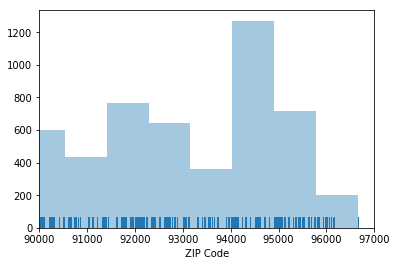

In [42]:
bank_df['ZIP Code'].value_counts()
sns.distplot(bank_df['ZIP Code'],kde=False,rug=True,bins=100)
plt.xlim([90000,97000])

# Since ZIP Code is distributed more or less in a uniform manner, it is better not to drop the column.
# Removing ZIP is ideal decision when data is concentrated more on a single range.

0    4520
1     480
Name: Personal Loan, dtype: int64


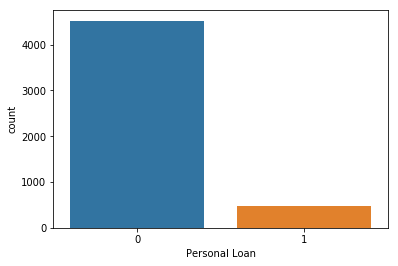

In [43]:
sns.countplot(bank_df['Personal Loan'])
print(bank_df['Personal Loan'].value_counts())

# BEFORE REMOVING OUTLIERS --> NUMBER OF '1's is 480
# Since the classes are heavily skewed(ie. '0's is more than '1's), the prediction for 1 will not be very efficient

In [44]:
print((bank_df['Experience']<0).value_counts())

# There are 52 records having experience less than 0. Experience should not be 0.
# Negative experience can be treated as 0. But this might also be due to data entry error.
# It is better to contact the data source for this discrepancy
# Or if time does not persist, it is better to perform regression with 'experience' as target variable 
#           and predicting the values for the negative experiences.
# But in this project, I will be removing the records with experience less than 0

bank_df=bank_df[bank_df['Experience']>=0]
bank_df.shape

False    4948
True       52
Name: Experience, dtype: int64


(4948, 13)

In [10]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4948.0,45.557195,11.320735,24.0,36.00,46.0,55.0,67.0
Experience,4948.0,20.331043,11.311973,0.0,10.75,20.0,30.0,43.0
Income,4948.0,73.814470,46.112596,8.0,39.00,64.0,98.0,224.0
ZIP Code,4948.0,93151.573363,2126.669017,9307.0,91911.00,93437.0,94608.0,96651.0
Family,4948.0,2.391471,1.148444,1.0,1.00,2.0,3.0,4.0
CCAvg,4948.0,1.935926,1.747694,0.0,0.70,1.5,2.6,10.0
Education,4948.0,1.878941,0.839745,1.0,1.00,2.0,3.0,3.0
Mortgage,4948.0,56.634398,101.828885,0.0,0.00,0.0,101.0,635.0
Personal Loan,4948.0,0.097009,0.296000,0.0,0.00,0.0,0.0,1.0
Securities Account,4948.0,0.104285,0.305660,0.0,0.00,0.0,0.0,1.0


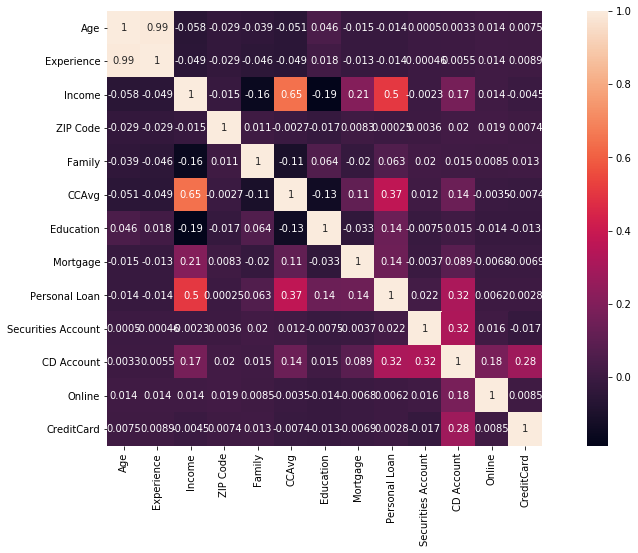

In [118]:
plt.figure(figsize=(16, 8))
sns.heatmap(bank_df.corr(),annot=True,square=True)


In [45]:
# As seen in the heatmap above, 'Personal Loan' is very minutely affected by 'Zip' ie. 0.0002.
# And ZIP is also not affecting any other attribute to considerable extend.
# So, it is better not included in the data set

bank_df.drop(['ZIP Code'],inplace=True,axis=1)

In [46]:
bank_df['Personal Loan'].value_counts()
bank_df_withOutliers = bank_df.copy()
bank_df_withOutliers.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [47]:
def removeOutliers(column,df):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    df=df[df[column]<(q3+(1.5*iqr))]
    df=df[df[column]>(q1-(1.5*iqr))]
    return df

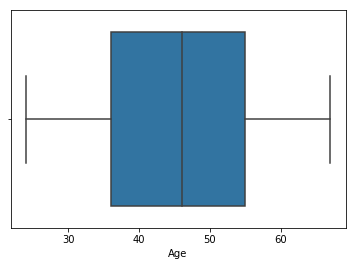

In [63]:
sns.boxplot(bank_df['Age'])

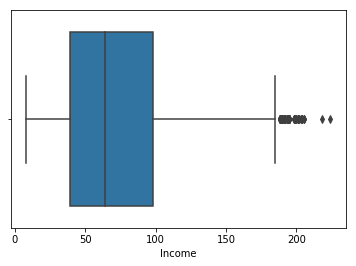

In [211]:
sns.boxplot(bank_df['Income'])


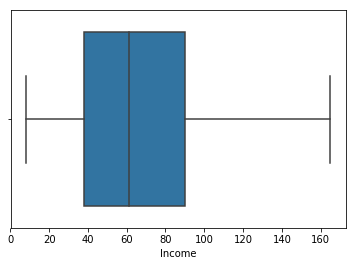

In [48]:
bank_df=removeOutliers('Income',bank_df)
bank_df=removeOutliers('Income',bank_df)
bank_df=removeOutliers('Income',bank_df)
bank_df=removeOutliers('Income',bank_df)
sns.boxplot(bank_df['Income'])

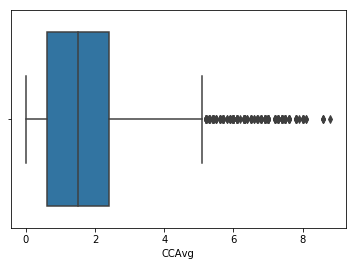

In [49]:
sns.boxplot(bank_df['CCAvg'])
bank_df=removeOutliers('CCAvg',bank_df)
bank_df=removeOutliers('CCAvg',bank_df)
bank_df=removeOutliers('CCAvg',bank_df)

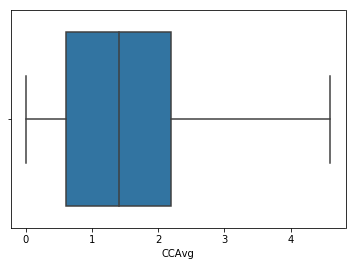

In [66]:
sns.boxplot(bank_df['CCAvg'])

0    4159
1     229
Name: Personal Loan, dtype: int64


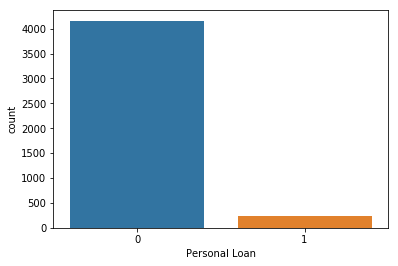

In [50]:
sns.countplot(bank_df['Personal Loan'])
print(bank_df['Personal Loan'].value_counts())

# AFTER REMOVING OUTLIERS --> NUMBER OF '1's is 229
# So, on removing the outliers, we have lost half of the records with Personal Loan value as '1'
# It is advisable to use a model which remains unaffected by outliers so that we reduce class inequality
# The model which is not affected by outliers is KNN. So, the best model will be KNN or SVC

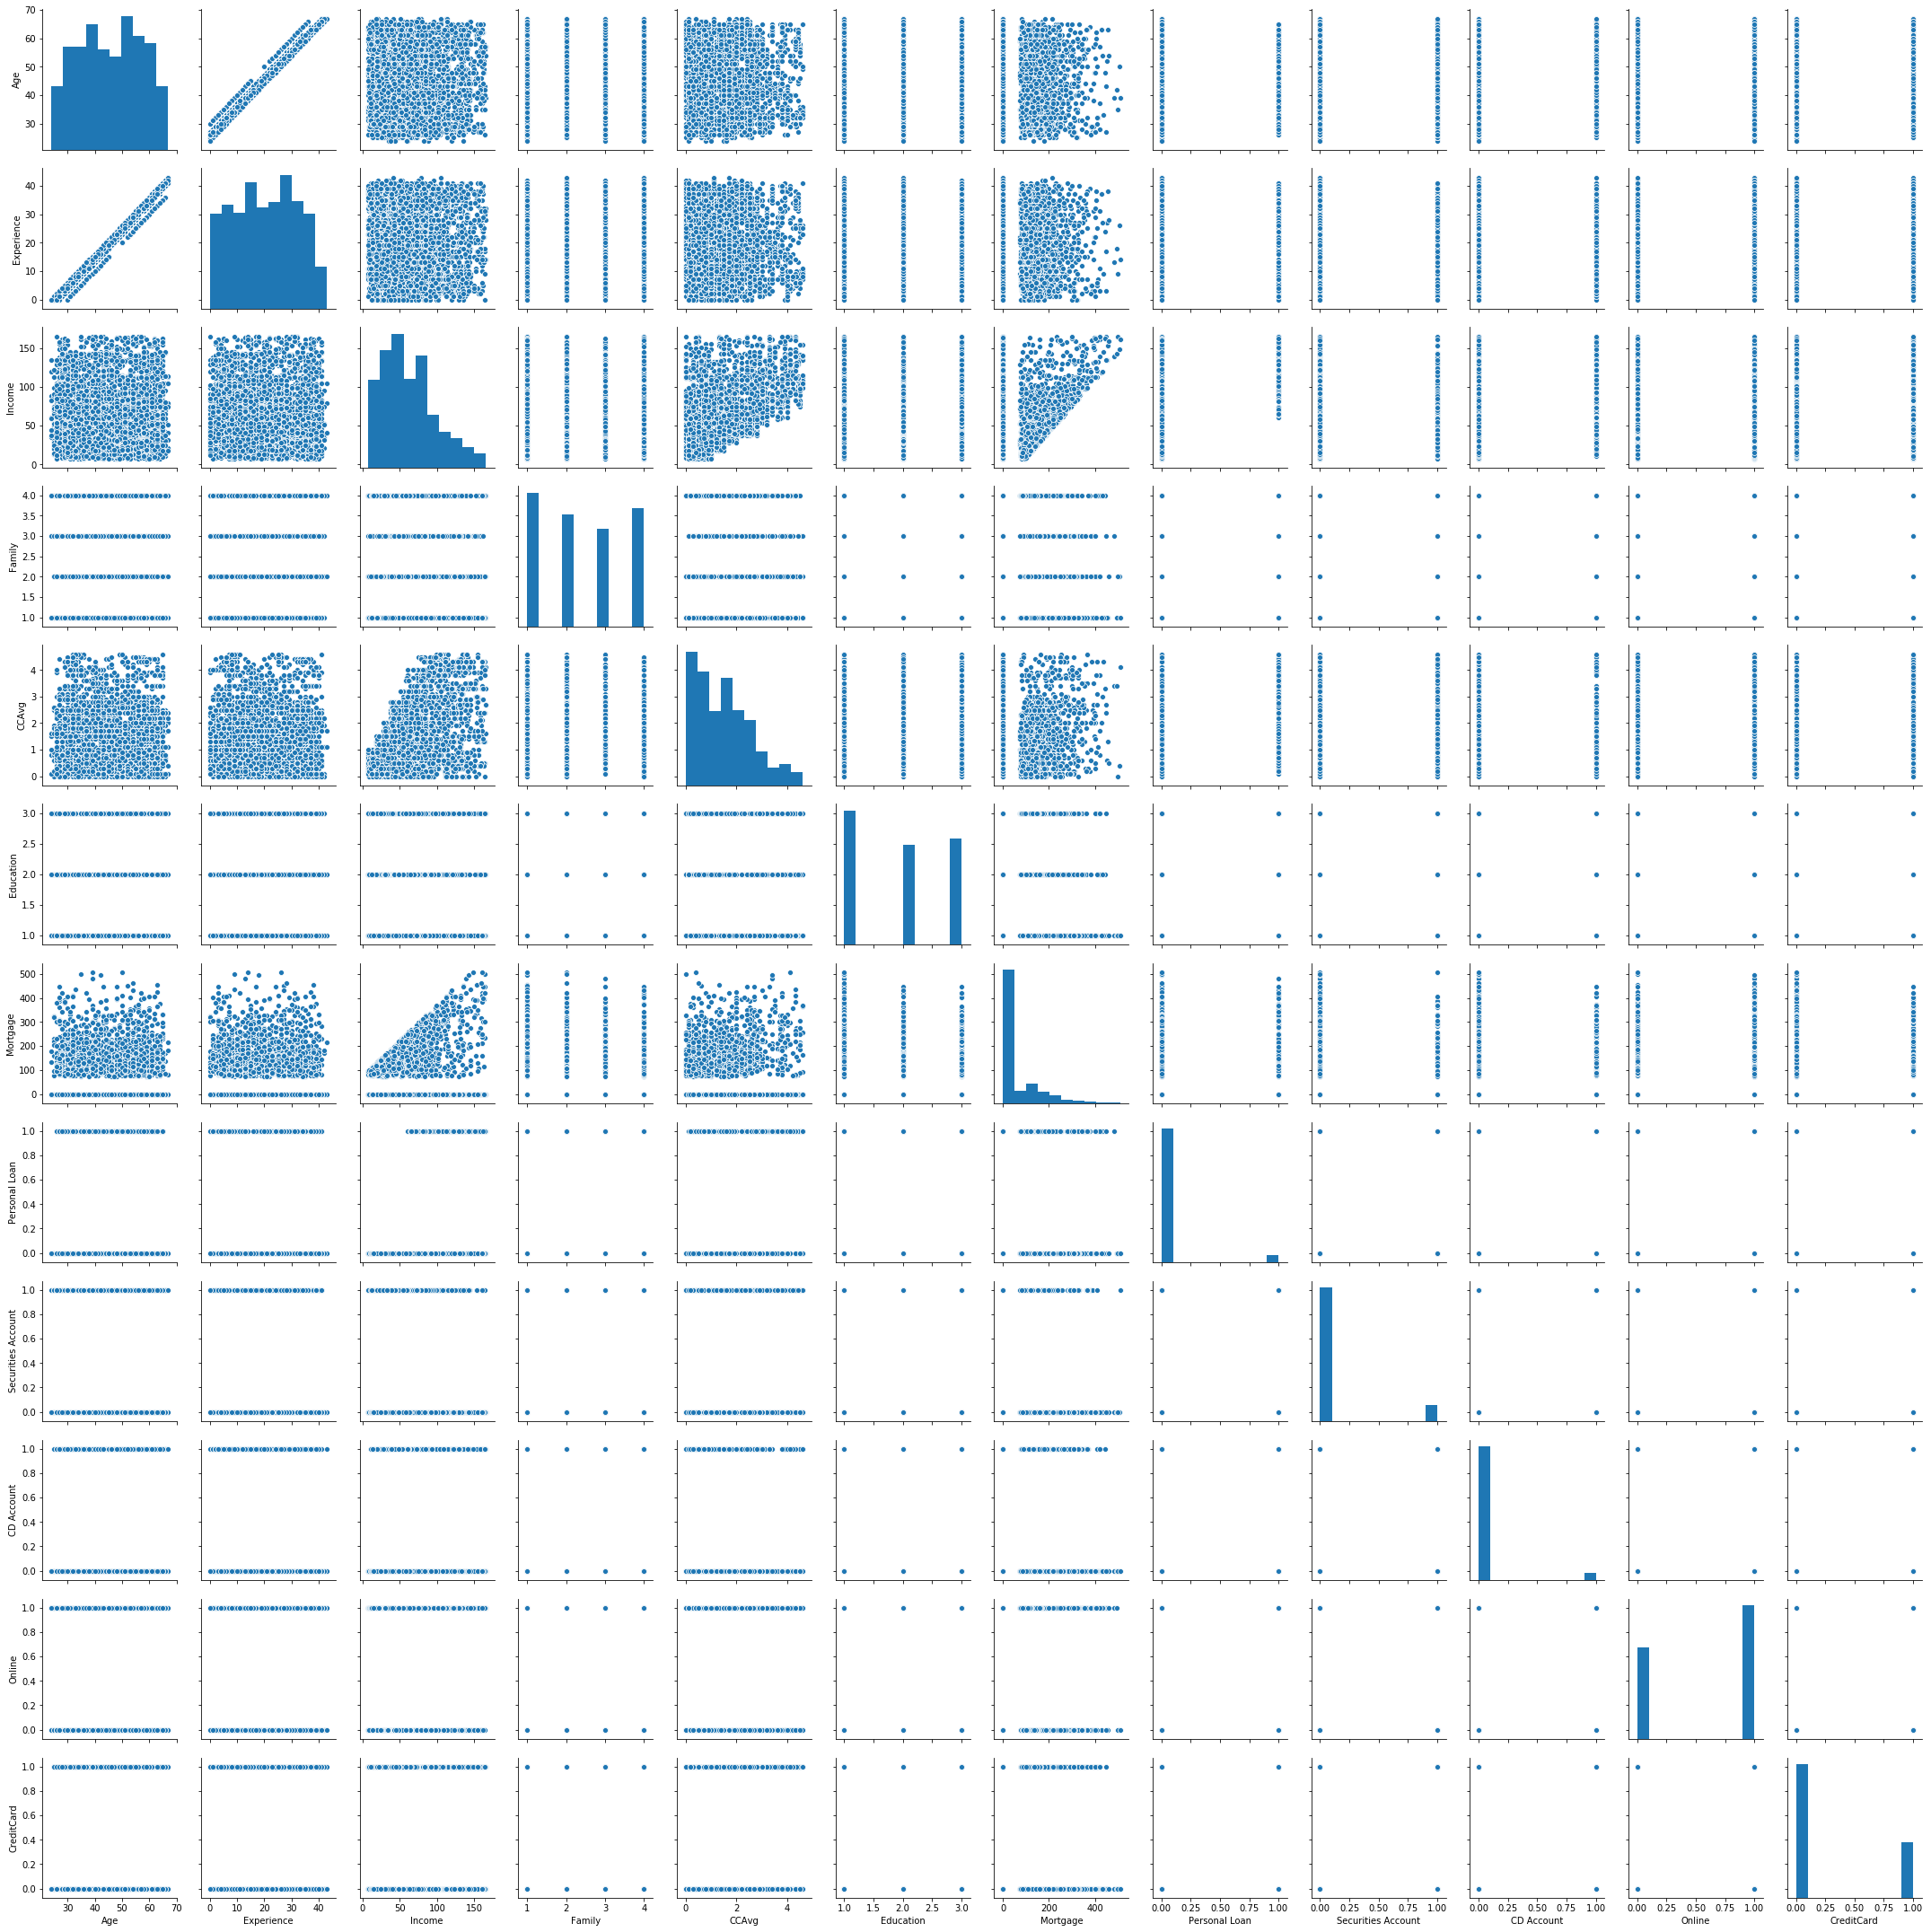

In [214]:
sns.pairplot(bank_df)
plt.show()

In [85]:
bank_df.shape

(4388, 12)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

logReg_df=bank_df.copy()
model = LogisticRegression()
y=logReg_df['Personal Loan']
logReg_df.drop(['Personal Loan'],axis=1,inplace=True)
X=logReg_df

In [76]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.30,random_state=1)
model.fit(X_train,y_train)
y_predicted= model.predict(X_test)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [77]:
print(model.score(X_test,y_test))
print(metrics.confusion_matrix(y_test,y_predicted))
print(metrics.recall_score(y_test,y_predicted))


# This model is not efficient in predicting '1' as the correct predictions(32) is less than the wrong predictions(36)

0.9673500379650721
[[1242    7]
 [  36   32]]
0.47058823529411764


In [71]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn import preprocessing

zScore_df=bank_df.apply(zscore)
zScore_df.head()

y=zScore_df['Personal Loan']
zScore_df.drop(['Personal Loan'],axis=1,inplace=True)
X=zScore_df
encoder=preprocessing.LabelEncoder()
encoded_y=encoder.fit_transform(y)

X_train, X_test, y_train, y_test =train_test_split(X,encoded_y,test_size=0.30,random_state=1)


Text(0, 0.5, 'Mean error')

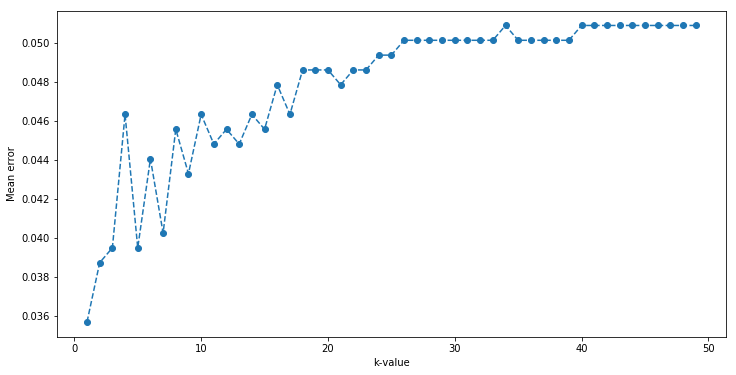

In [57]:
error=[]
for i in range(1,50):
    knn_imodel=KNeighborsClassifier(n_neighbors=i)
    knn_imodel.fit(X_train,y_train)
    y_iPredicted=knn_imodel.predict(X_test)
    error.append(np.mean(y_test != y_iPredicted))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,50),error,marker='o', linestyle='dashed')
plt.xlabel('k-value')
plt.ylabel('Mean error')

In [72]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
y_predicted= knn_model.predict(X_test)

#print(knn_model.score(X_test,y_test))
print(metrics.confusion_matrix(y_test,y_predicted))
print(metrics.accuracy_score(y_test,y_predicted))
print(metrics.precision_score(y_test,y_predicted))
print(metrics.recall_score(y_test,y_predicted))

# This model is not efficient in predicting '1' as the correct predictions(19) is less than the wrong predictions(49)

[[1246    3]
 [  49   19]]
0.9605163249810175
0.8636363636363636
0.27941176470588236


Text(0, 0.5, 'Mean error')

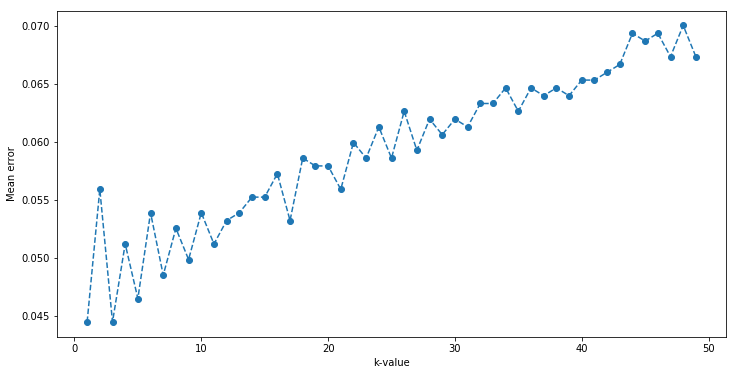

In [73]:
# Performing KNN model on data without removing outliers

zScore_outliersdf=bank_df_withOutliers.apply(zscore)

y=zScore_outliersdf['Personal Loan']
zScore_outliersdf.drop(['Personal Loan'],axis=1,inplace=True)
X=zScore_outliersdf
encoder=preprocessing.LabelEncoder()
encoded_y=encoder.fit_transform(y)

X_train, X_test, y_train, y_test =train_test_split(X,encoded_y,test_size=0.30,random_state=1)

error=[]
for i in range(1,50):
    knn_imodel=KNeighborsClassifier(n_neighbors=i)
    knn_imodel.fit(X_train,y_train)
    y_iPredicted=knn_imodel.predict(X_test)
    error.append(np.mean(y_test != y_iPredicted))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,50),error,marker='o', linestyle='dashed')
plt.xlabel('k-value')
plt.ylabel('Mean error')



In [74]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
y_predicted= knn_model.predict(X_test)

#print(knn_model.score(X_test,y_test))
print(metrics.confusion_matrix(y_test,y_predicted))
print(metrics.accuracy_score(y_test,y_predicted))
print(metrics.recall_score(y_test,y_predicted))
print(metrics.precision_score(y_test,y_predicted))

# KNN model performed on data without removing outliers has performed well.
# The number of correct predictions is more than the number of wrong predictions

[[1331    9]
 [  60   85]]
0.9535353535353536
0.5862068965517241
0.9042553191489362


In [79]:
from sklearn.naive_bayes import GaussianNB

naiveBayes_model=GaussianNB()
naiveBayes_df=bank_df.copy()

y=naiveBayes_df['Personal Loan']
naiveBayes_df.drop(['Personal Loan'],axis=1,inplace=True)
X=naiveBayes_df

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.30,random_state=1)
naiveBayes_model.fit(X_train,y_train)
y_predicted= naiveBayes_model.predict(X_test)

print(metrics.confusion_matrix(y_test,y_predicted))
print(metrics.accuracy_score(y_test,y_predicted))
print('Recall Score : ',metrics.recall_score(y_test,y_predicted))

# This model is not the best model because the number of wrong predictions for 0's is more than other models.
# Also the predictions for 1's is also not very good in numbers but atleast better than most models.

[[1183   66]
 [  32   36]]
0.9255884586180714
Recall Score :  0.5294117647058824


In [62]:
from sklearn import svm

svm_model = svm.SVC()

svc_df=bank_df.copy()
s
y=svc_df['Personal Loan']
svc_df.drop(['Personal Loan'],axis=1,inplace=True)
X=svc_df

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.30,random_state=1)
svm_model.fit(X_train,y_train)
y_predicted= svm_model.predict(X_test)

print(metrics.confusion_matrix(y_test,y_predicted))
print(metrics.accuracy_score(y_test,y_predicted))

# This model is very accurate for 0's but also very inaccurate for 1's

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[1249    0]
 [  67    1]]
0.9491268033409264


In [63]:
# Performing SVC model on data without removing outliers

svc_withOutliersdf=bank_df_withOutliers.copy()

y=svc_withOutliersdf['Personal Loan']
svc_withOutliersdf.drop(['Personal Loan'],axis=1,inplace=True)
X=svc_withOutliersdf

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.30,random_state=1)
svm_model.fit(X_train,y_train)
y_predicted= svm_model.predict(X_test)

print(metrics.confusion_matrix(y_test,y_predicted))
print(metrics.accuracy_score(y_test,y_predicted))

# This model is very accurate for 0's but also very inaccurate for 1's

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[1337    3]
 [ 141    4]]
0.9030303030303031


In [ ]:

# On all the models performed on the dataset, KNN has proved to be more efficient than other models when performed on data without removing outliers.
# Recall score for KNN for data without outliers = 0.27941176470588236
# Recall score for KNN for data with outliers = 0.5862068965517241

# So, clearly KNN model has proved to be the best model when performed on data without removing the outliers.